In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/archive (1)/healthcare_dataset.csv')

In [3]:
df.shape

(55500, 15)

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Data Cleaning
- [x] Dropping Un-necessary Columns
- [x] Changing Datatypes
- [x] Renaming Columns

In [91]:
df.drop(columns = 'Room Number',inplace = True)

In [5]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [6]:
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

In [7]:
df.rename(columns = {'Name' : 'Patient_Name','Doctor' : 'Doctor_Name'},inplace = True)

## Exploratory Data Analysis

In [8]:
df.head()

,Patient_Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor_Name,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Demographics and Conditions Analysis:

Q1 : What is the distribution of patients by age and gender?

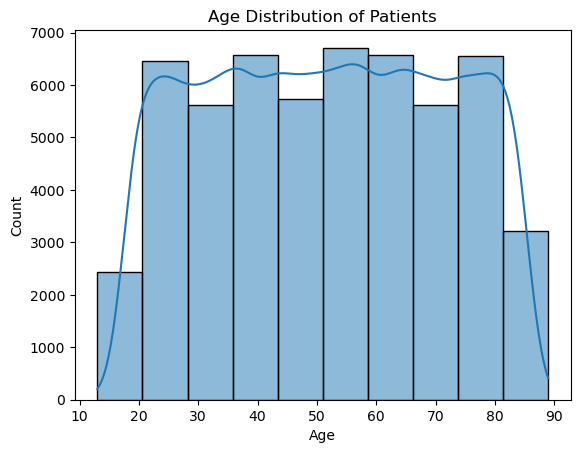

In [9]:
# Age Distribution
sns.histplot(df['Age'], bins = 10, kde = True)
plt.title('Age Distribution of Patients')
plt.show()

- The age distribution is relatively uniform between the ages of approximately 20 and 80. This indicates that the dataset has a balanced representation of individuals across these age groups.
- Most age groups within this range have around 6000 individuals.
- There are fewer individuals in the younger age group (below 20) and the older age group (above 80).

Text(0.5, 1.0, 'Gender Distribution of Patients')

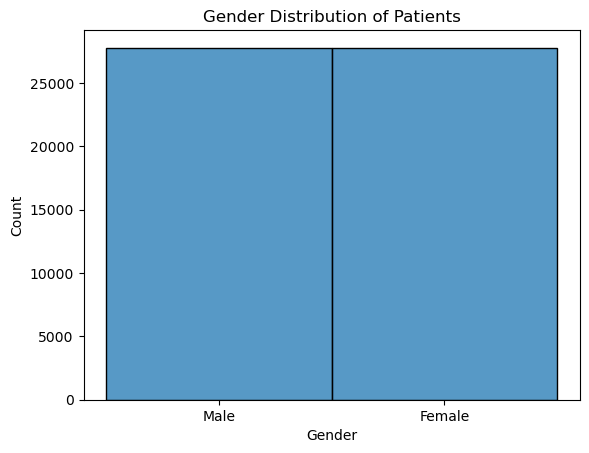

In [10]:
# Gender Distribution
sns.histplot(df['Gender'])
plt.title('Gender Distribution of Patients')

The Gender Distribution shows that the both genders are almost equally Distributed

Q2: Are there any common medical conditions prevalent among certain age groups or genders?

In [11]:
# Creating new column
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 42, 54, 66,78,90], labels=['0-18', '19-30', '31-42', '43-54', '55-66','67-78','78+'])

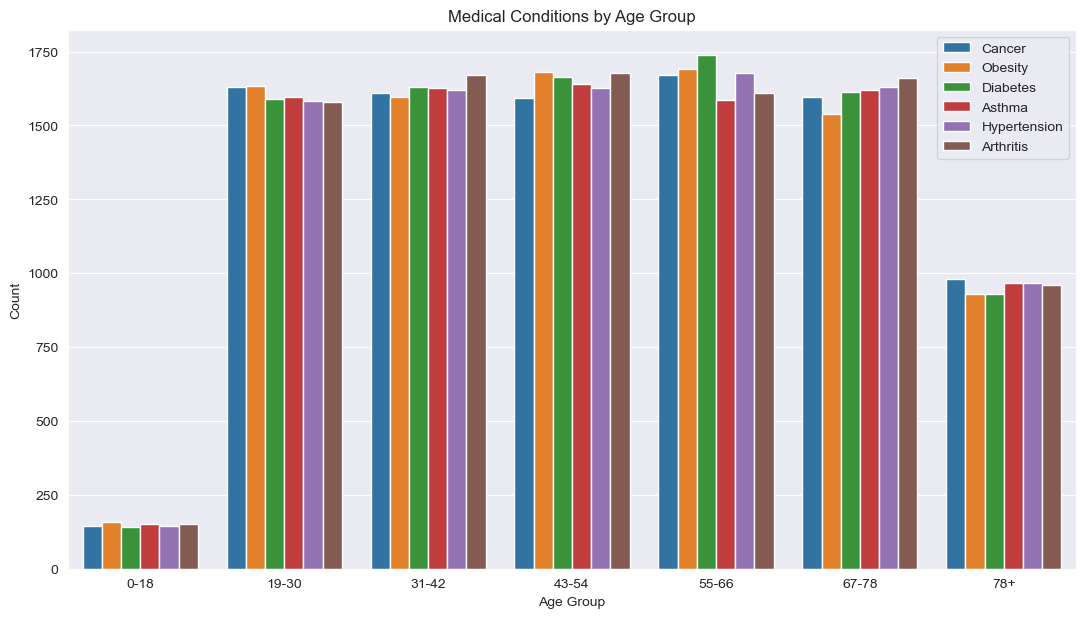

In [135]:
# Medical conditions by age group
plt.figure(figsize = (13,7))
sns.countplot(data = df, x = 'Age Group',hue = 'Medical Condition')
plt.title('Medical Conditions by Age Group')
plt.ylabel('Count')
plt.legend(loc='upper right')
sns.set_style("darkgrid")
plt.show()

- As we can see above plot conditions like cancer, obesity, diabetes and hypertension seem to be more prevalent in age groups, particularly from ages 55 to 66
- cancer diagnoses appear to be more frequent among those aged 55-66 compared to younger age groups and older age group
- Asthma and Arthritis diagnoses appear to more frequent among those aged 43-54


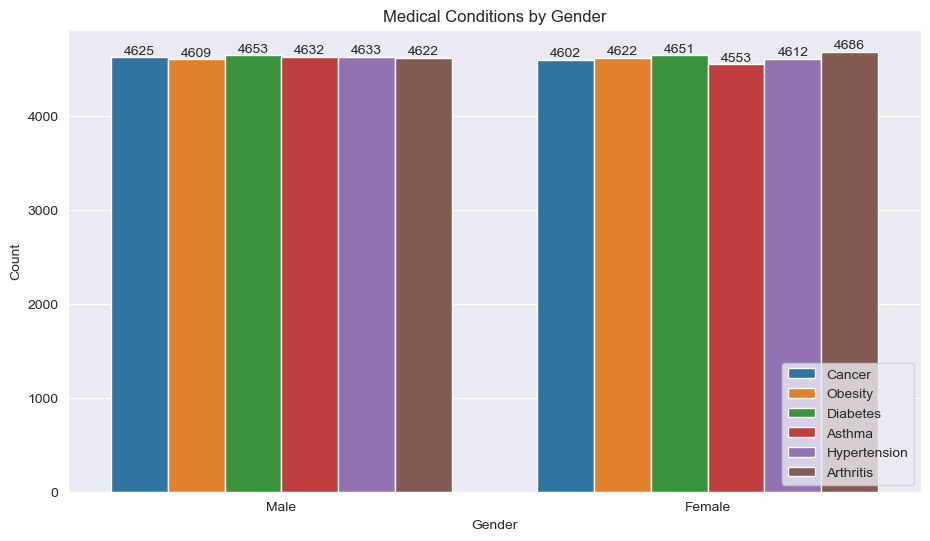

In [136]:
# Medical Conditions by Age Group 
plt.figure(figsize = (11,6))
ax = sns.countplot(data=df, x='Gender', hue='Medical Condition')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Medical Conditions by Gender')
plt.ylabel('Count')
plt.legend(loc='lower right')
plt.show()

- Cancer, Diabetes, Asthma and Hypertension are likely to increase in males compared to females
- Obesity and Arthritis are likely to increase in females compared to males

## Admission and Discharge Analysis:

Q3: What is the average length of hospital stay for different medical conditions?

In [15]:
# creating length_of_stay(in days) column
df['Length_of_Stay(in days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [16]:
avg_length_of_stay = df.groupby('Medical Condition')['Length_of_Stay(in days)'].mean().round(2)

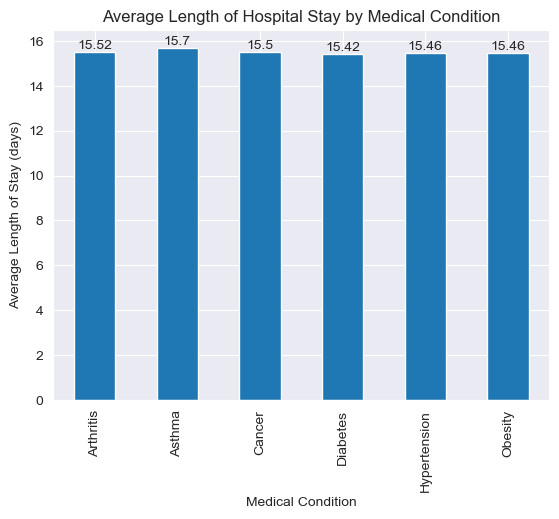

In [137]:
ax = avg_length_of_stay.plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Length of Hospital Stay by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Length of Stay (days)')
plt.show()

Q4: Is there a trend in the number of admissions over time?

In [19]:
# creating new column
df['Admission_year'] = df['Date of Admission'].dt.year

In [20]:
year_count = df['Admission_year'].value_counts().reset_index()

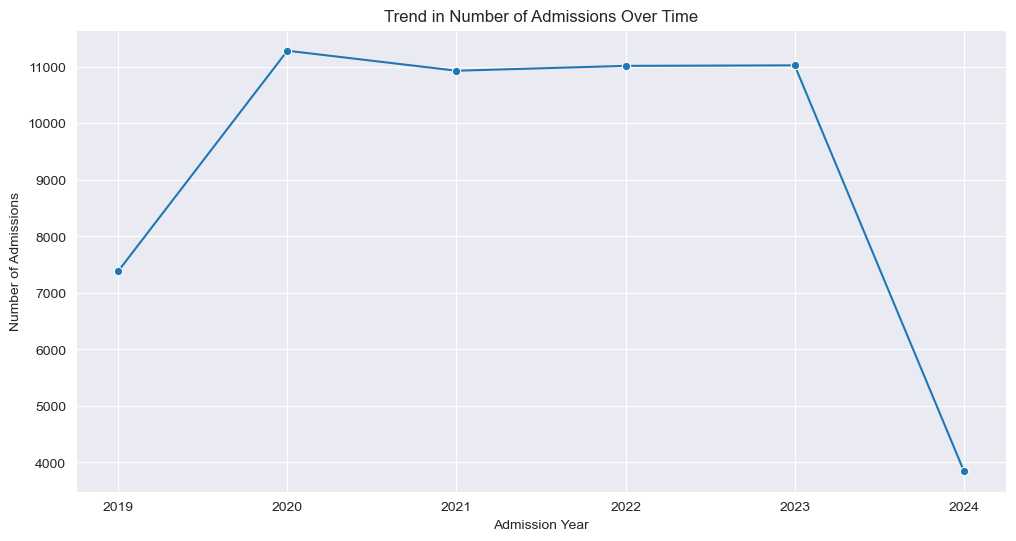

In [138]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = year_count, x = 'Admission_year',y = 'count', marker = 'o', linestyle = '-')
plt.title('Trend in Number of Admissions Over Time')
plt.xlabel('Admission Year')
plt.ylabel('Number of Admissions')
plt.show()

- Peak in 2020: There was a significant peak in the number of admissions around 2020, reaching the highest point during the time period shown.
- Decline after 2020: After the peak in 2020, the number of admissions experienced a steep decline, reaching a low point around 2023-2024.

## Financial Analysis:

Q5: What is the average billing amomunt for different medical conditions or Types of Admissions?

In [23]:
avg_amnt_for_medical_conditions = df.groupby('Medical Condition').agg({'Billing Amount' : 'mean'}).round(2).reset_index()

Text(0.5, 1.0, 'average billing amomunt for different medical conditions')

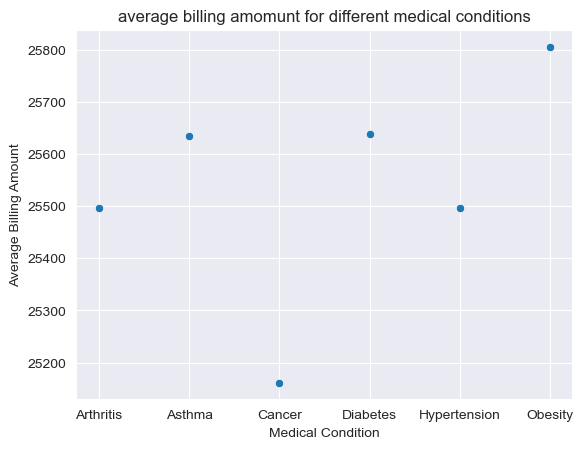

In [139]:
# average billing amomunt for different medical conditions
sns.scatterplot(data = avg_amnt_for_medical_conditions, x = 'Medical Condition', y = 'Billing Amount')
plt.ylabel('Average Billing Amount')
plt.title('average billing amomunt for different medical conditions')

In [25]:
avg_amnt_for_Admission_Type = df.groupby('Admission Type').agg({'Billing Amount' : 'mean'}).round(2).reset_index()

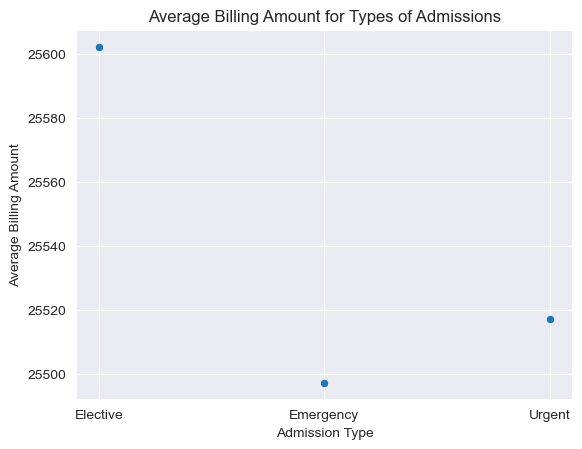

In [140]:
# average billing amomunt for types of Admission
sns.scatterplot(data = avg_amnt_for_Admission_Type, x = 'Admission Type', y = 'Billing Amount')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing Amount for Types of Admissions')
plt.show()

Q6: How does the billing amount vary with the insurance provider?

In [28]:
avg_billing_after_insurance = df.groupby('Insurance Provider').agg({'Billing Amount' : 'mean'}).reset_index()

In [29]:
avg_billing_after_insurance

,Insurance Provider,Billing Amount
0,Aetna,25553.294506
1,Blue Cross,25613.011503
2,Cigna,25525.766314
3,Medicare,25615.990508
4,UnitedHealthcare,25389.172390


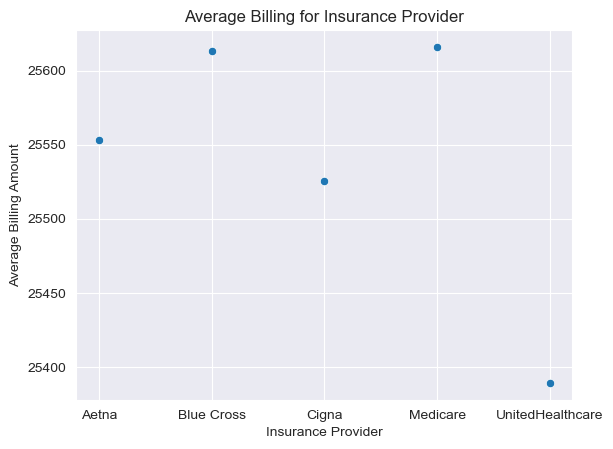

In [141]:
sns.scatterplot(data = avg_billing_after_insurance, x = 'Insurance Provider', y = 'Billing Amount')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing for Insurance Provider')
plt.show()

- As we can see above plot UnitedHealtcare is only one which provided insurance after which patients had to pay lowest bill
- And Medicare are associated with higher billing amounts

## Doctor and Hospital Analysis:

Q7: Which doctors or hospitals have the highest number of patients?

In [31]:
Top_Hospitals = df['Hospital'].value_counts().head(10).reset_index()
Top_Doctors = df['Doctor_Name'].value_counts().head(10).reset_index()

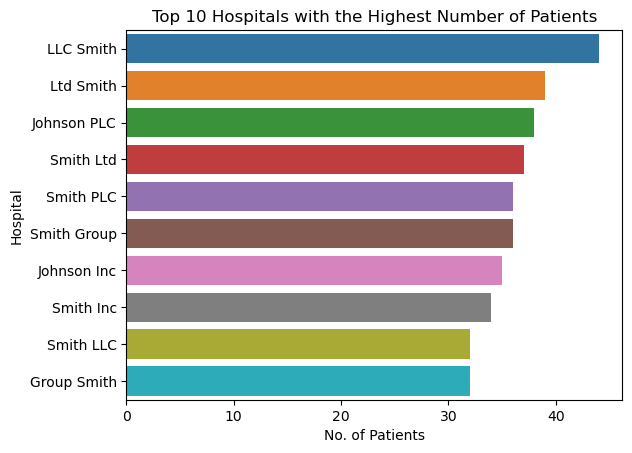

In [32]:
sns.barplot(data = Top_Hospitals, x = 'count', y = 'Hospital', orient = 'h')
plt.title('Top 10 Hospitals with the Highest Number of Patients')
plt.xlabel('No. of Patients')
plt.show()

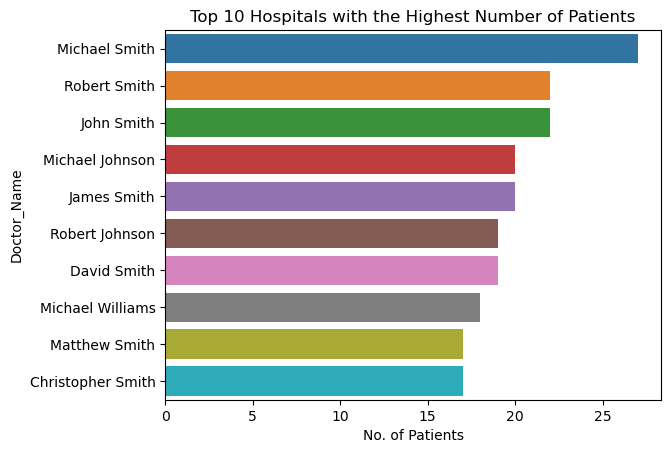

In [33]:
sns.barplot(data = Top_Doctors, x = 'count', y = 'Doctor_Name', orient = 'h')
plt.title('Top 10 Hospitals with the Highest Number of Patients')
plt.xlabel('No. of Patients')
plt.show()

## Medication and Test Results Analysis:

Q8: What are the most commonly prescribed medications for different medical conditions?

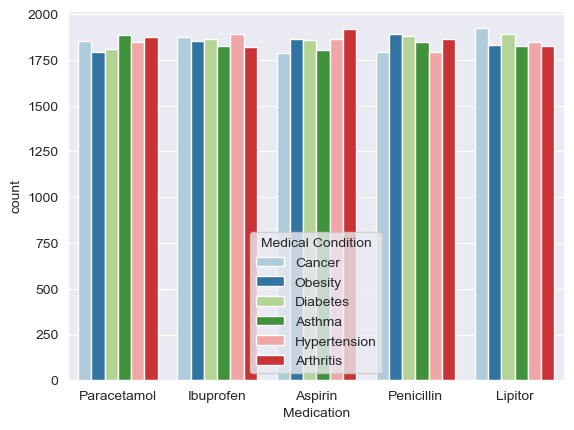

In [142]:
sns.countplot(data = df, x = 'Medication', hue = 'Medical Condition', palette = 'Paired')
plt.show()

- Lipitor is highly given to Cancer and Diabetes Patients
- Penicillin is highly given to Obesity Patients
- Aspirin is highly given to Aspirin Patients
- Paracetamol is highly given to Asthma Patients
- Ibuprofen is highly given to Hypertension Patients

Q9: How do test results vary with different medical conditions or medications?

In [70]:
df.head(2)

,Patient_Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor_Name,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Length_of_Stay(in days),Admission_year
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,19-30,2,2024
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,55-66,6,2019


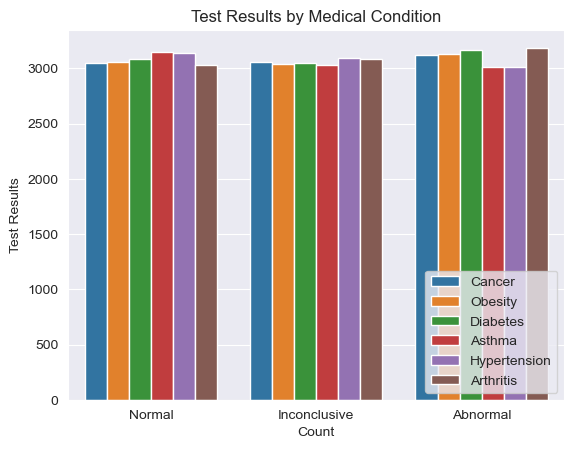

In [143]:
sns.countplot(x='Test Results', hue='Medical Condition', data=df)
plt.title('Test Results by Medical Condition')
plt.legend(loc = 'lower right')
plt.xlabel('Count')
plt.ylabel('Test Results')
plt.show()

- Test Results mostly Abnormal count in cancer, Diabetes, Obesity and Asrtritis
- Test Results mostly Normal count in Asthma and Hypertension

## Analyzing Cancer Diseases

In [92]:
df.head()

,Patient_Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor_Name,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Age Group,Length_of_Stay(in days),Admission_year
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,19-30,2,2024
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,55-66,6,2019
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,67-78,15,2022
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,19-30,30,2020
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,43-54,20,2022


In [93]:
df_cancer = df[df['Medical Condition'] == 'Cancer']

Q10: How do Gender vary with Cancer?

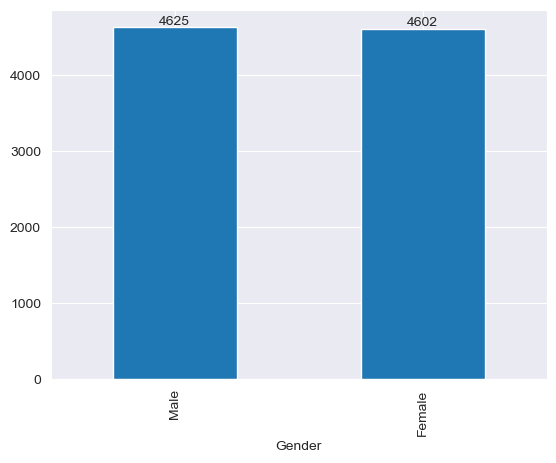

In [144]:
ax = df_cancer['Gender'].value_counts().plot(kind = 'bar')
for bars in ax.containers:
    ax.bar_label(bars)

- Males are likely bit increase to diagnose cancer

Q11: Top 10 Age counts with Cancer Patients?

In [116]:
age_count = df_cancer['Age'].value_counts().head(10).reset_index()

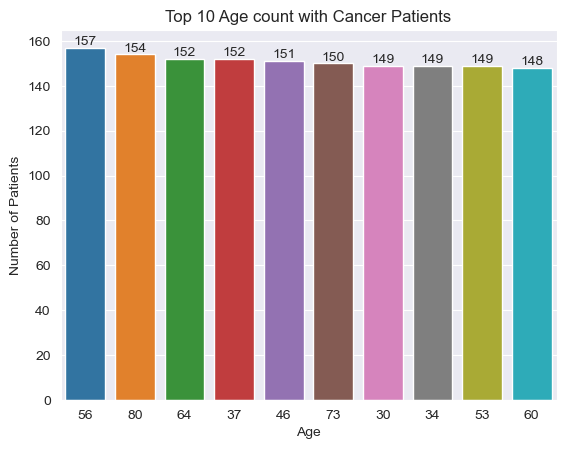

In [145]:
ax = sns.barplot(data = age_count, x = 'Age', y = 'count',order=age_count.sort_values('count',ascending = False).Age)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Age count with Cancer Patients')    
plt.ylabel('Number of Patients')
plt.show()    

In [125]:
df_cancer['Admission Type'].value_counts()

Admission Type
Elective     3148
Urgent       3064
Emergency    3015
Name: count, dtype: int64

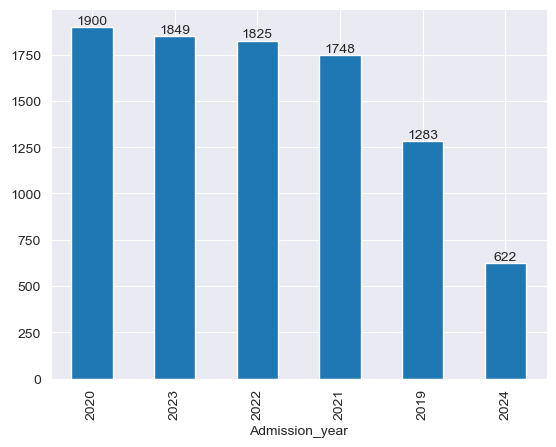

In [146]:
ax = df_cancer['Admission_year'].value_counts().plot(kind = 'bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()